# Projet Numérique : Dynamique Quantique

## Résolution en états stationnaire 

Numba : a voir vers la fin
http://www.enit.rnu.tn/fr/Minds/quant/amphi6MQ.pdf pour explication sin et cos

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy import constants
import math

N = 1000
L = 20

dx = 1.0*L/N

print("dx : ", dx)

## On initialise x tel que 

x = np.linspace(-L,L,N)

print("x : \n",x)

dx :  0.02
x : 
 [-20.         -19.95995996 -19.91991992 -19.87987988 -19.83983984
 -19.7997998  -19.75975976 -19.71971972 -19.67967968 -19.63963964
 -19.5995996  -19.55955956 -19.51951952 -19.47947948 -19.43943944
 -19.3993994  -19.35935936 -19.31931932 -19.27927928 -19.23923924
 -19.1991992  -19.15915916 -19.11911912 -19.07907908 -19.03903904
 -18.998999   -18.95895896 -18.91891892 -18.87887888 -18.83883884
 -18.7987988  -18.75875876 -18.71871872 -18.67867868 -18.63863864
 -18.5985986  -18.55855856 -18.51851852 -18.47847848 -18.43843844
 -18.3983984  -18.35835836 -18.31831832 -18.27827828 -18.23823824
 -18.1981982  -18.15815816 -18.11811812 -18.07807808 -18.03803804
 -17.997998   -17.95795796 -17.91791792 -17.87787788 -17.83783784
 -17.7977978  -17.75775776 -17.71771772 -17.67767768 -17.63763764
 -17.5975976  -17.55755756 -17.51751752 -17.47747748 -17.43743744
 -17.3973974  -17.35735736 -17.31731732 -17.27727728 -17.23723724
 -17.1971972  -17.15715716 -17.11711712 -17.07707708 -17.03

V :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

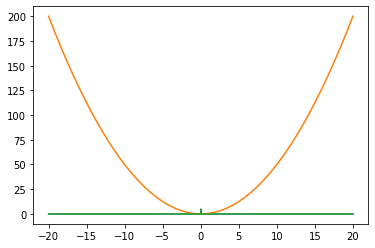

In [85]:
## On commence par former la liste de valeurs des vecteurs et V.

V = np.zeros(N) #potentiel nul
V2 = np.zeros(N) #potentiel harmonique
V3 = np.zeros(N)

''' Pour un potentiel fini :
for i in range(x.size):
    if (x[i]<= -L/2) or (x[i]>=L/2):
        V[i] = 10

'''

omega = 1
masse = 1
hbarre = 1

for i in range(N):
    V2[i] = masse*(omega*x[i])**2 / 2

length = N*0.001
energie_p = 5
for i in range(N):
    if i>(N/2-length/2) and i<(N/2+length/2):
        V3[i] = energie_p

print("V : ", V)
print("V2 : ", V2)
print("V3 : ", V3)

plt.plot(x,V)
plt.plot(x,V2)
plt.plot(x,V3)

plt.show()

In [34]:
## Ensuite, on forme les matrices d et e diagonales principale et supérieure (resp) de H

def get_matrice(V):

    d = np.zeros(N)
    e= np.zeros(N-1)

    for i in range(V.size):
        d[i] = 2/(dx**2) + V[i]

    for i in range(e.size):
        e[i] = -1/(dx**2)
        
    return d,e

d,e = get_matrice(V)

print("d : \n", d)
print("e : \n", e)

d : 
 [5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 50

In [35]:
from scipy.linalg import eigh_tridiagonal

## Puis, on calcule w et v respectivement les valeurs propres et vecteurs propres de H

w, v = eigh_tridiagonal(d,e)

print("w : \n", w)
print("v : \n", v)

w : 
 [2.46247167e-02 9.84986242e-02 2.21620995e-01 3.93990616e-01
 6.15605790e-01 8.86464333e-01 1.20656358e+00 1.57590037e+00
 1.99447108e+00 2.46227157e+00 2.97929724e+00 3.54554301e+00
 4.16100328e+00 4.82567200e+00 5.53954262e+00 6.30260811e+00
 7.11486095e+00 7.97629315e+00 8.88689621e+00 9.84666117e+00
 1.08555786e+01 1.19136385e+01 1.30208305e+01 1.41771437e+01
 1.53825666e+01 1.66370875e+01 1.79406940e+01 1.92933731e+01
 2.06951117e+01 2.21458959e+01 2.36457113e+01 2.51945433e+01
 2.67923765e+01 2.84391953e+01 3.01349834e+01 3.18797241e+01
 3.36734002e+01 3.55159941e+01 3.74074875e+01 3.93478620e+01
 4.13370983e+01 4.33751769e+01 4.54620777e+01 4.75977801e+01
 4.97822631e+01 5.20155052e+01 5.42974843e+01 5.66281781e+01
 5.90075636e+01 6.14356172e+01 6.39123152e+01 6.64376330e+01
 6.90115459e+01 7.16340285e+01 7.43050549e+01 7.70245989e+01
 7.97926336e+01 8.26091318e+01 8.54740657e+01 8.83874071e+01
 9.13491274e+01 9.43591973e+01 9.74175873e+01 1.00524267e+02
 1.03679206e+02 1.

In [36]:
# On doit désormais normaliser les vecteurs propres :

def normalize(m, dx):
    m /= np.linalg.norm(m,axis=0)
    m /= np.sqrt(dx)
    return m

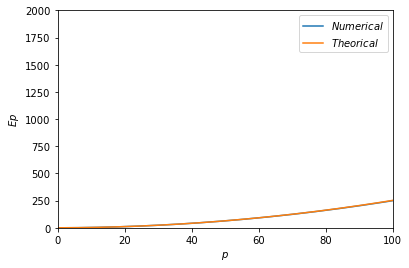

In [37]:
## On regarde la différence entre la courbe théorique et la courbe obtenu

p = np.arange(0,N,1)

Ep = np.zeros(N)
for i in range(N):
    Ep[i] = (np.pi*(i+1)/L)**2

plt.plot(p,w,label="$Numerical$")
plt.plot(p,Ep,label = "$Theorical$")
plt.xlabel('$p$')
plt.ylabel('$Ep$')
plt.xlim(0, 100)
plt.ylim(0, 2000)
plt.legend()
plt.savefig('document/energie_num_vs_theoric_n%.i.pdf' %N,format='pdf')
plt.savefig('document/energie_num_vs_theoric_n%.i' %N)
plt.show()

In [38]:
# On compare le théorique et le calculé pour psi

def psi_theo(p):
    psi_theo = np.zeros(N)
    for i in range(N):
        if (p%2 == 0): #fonction pair
            psi_theo[i] = np.sqrt(2/L)*np.cos(((p+1)*np.pi*x[i])/(L*2))
        else: #fonction impair
            psi_theo[i] = np.sqrt(2/L)*np.sin(((p+1)*np.pi*x[i])/(L*2))
    return psi_theo

def energie_pot(p,w):
    value_ep = np.zeros(N)
    for i in range(value_ep.size):
        value_ep[i] = w[p]
    return value_ep

In [39]:
# On crée la fonction pour former psi à partir de V (dans le cas où V n'est plus le même)

def get_psi(V):
    d,e = get_matrice(V)
    
    w, v = eigh_tridiagonal(d,e)
    
    for vec in v:
        normalize(v,dx)
    v0 = np.zeros((N,N))
    for i in range(N):
        for y in range(N):            #On échange ligne et colonnes
            v0[i][y] = v[y][i]
    
    return w,v0

# On crée la fonction pour afficher les graphiques

def get_graph(w,v,name,theorical_psi):
    for i in range(2):
        plt.plot(x,v[i]+w[i],label="Numérique $p=%i$" %i)
        plt.plot(x,theorical_psi(i)+w[i],label = "Théorique $p=%i$" %i)
        plt.plot(x,energie_pot(i,w),"--",label = "Ep pour $p=%i$" %i)
    plt.xlabel('$x$')
    plt.ylabel('$\Psi(x)$')
    plt.title('Norme de $\Psi(x)$ en fonction de la position x (%i itérations)' %N)
    plt.legend()
    plt.savefig('document/psi_fonction_de_x_%s_n%i.pdf' %(name,N),format='pdf')
    plt.savefig('document/psi_fonction_de_x_%s_n%i' %(name,N))
    plt.show()

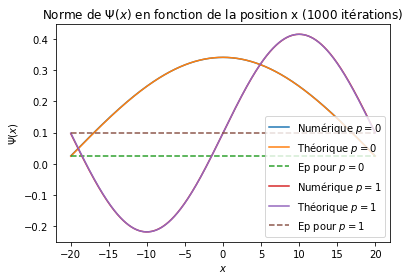

In [40]:
w,v = get_psi(V)

get_graph(w,v,"puit_infini",psi_theo)

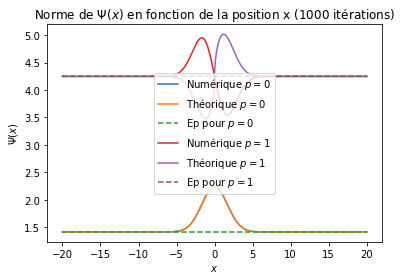

In [41]:
#potentiel harmonique 
def factoriel(x):
    if x <= 0:
        return 1
    else:
        return x*factoriel(x-1)

sigma = np.sqrt(np.sqrt(2.0))
#np.sqrt(hbarre/(masse*omega))
    
def psi_theo_harmo(p):
    psi_theo = np.zeros(N)
    p_hermite = special.hermite(p)
    
    for i in range(N):
        psi_theo[i] = (1/(np.sqrt(2**p*factoriel(p)*np.sqrt(np.pi)*sigma)))*np.exp((-x[i]**2)/(2*sigma**2))*p_hermite(x[i]/sigma)
    
    return np.sign(psi_theo)*(np.sqrt(abs(psi_theo)))

w,v = get_psi(V2)

get_graph(w,v,"harmonique",psi_theo_harmo)

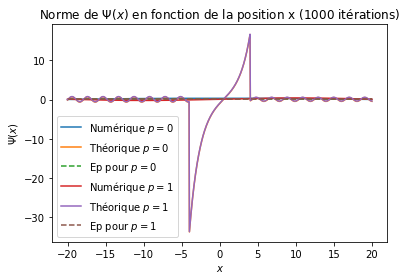

In [90]:
#barrière de potentiel

def psi_theo_barriere(p):
    psi_theo = np.zeros(N,dtype = 'complex_')
    energie = energie_p*0.95
    k = np.sqrt(2*masse*energie/(hbarre**2))
    l1 = constants.h/(2*masse*(energie-energie_p))
    l2 = constants.h/(2*masse*(energie_p-energie))
    r = (1+(l1/l2))/(1-(l1/l2))
    alpha = np.sqrt(2*(energie_p-energie))
    t = (2*k*alpha/(k**2+alpha**2))**2*np.exp(-2*alpha*length)
    
    A = 1
    B = (np.exp(-alpha*length)*(alpha-1j*k)+1j*k-alpha)/(np.exp(-alpha*length)*2*alpha*np.cosh(alpha*length)-1j*(k**2-alpha**2)/k*np.sinh(alpha*length))-1
    C = (alpha-1j*k)/(2*alpha*np.cosh(alpha*length)-1j*(k**2-alpha**2)/k*np.sinh(alpha*length))
    D = (1j*k-alpha)/(2*alpha*np.cosh(alpha*length)-1j*(k**2-alpha**2)/k*np.sinh(alpha*length))*(1/(np.exp(-alpha*length)))
    F = np.exp(-1j*k*length)/(np.cosh(alpha*length)-1j*(k**2-alpha**2)/(2*k*alpha)*np.sinh(alpha*length))
    
    for i in range(N):
        if i<(N/2-N*0.1):
            psi_theo[i] = A*np.exp(1j*k*x[i]) + B*np.exp(-1j*k*x[i])
            #psi_theo[i] = A*2*np.cos(k*x[i])
            
        elif i<(N/2+N*0.1):
            psi_theo[i] = C*np.exp(alpha*x[i]) + D*np.exp(-alpha*x[i])
            
        else:
            psi_theo[i] = F*np.exp(1j*k*x[i])
            
    return np.real(psi_theo)
                              
w,v = get_psi(V3)

get_graph(w,v,"barrière de potentiel",psi_theo_barriere)